In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
from census import Census

# Census API Key
from config import api_key
c = Census(api_key, year=2016)
#c.acs5.tables()

In [2]:
# plotly.tools.set_credentials_file(username='saramichelee', api_key=plotly_key)

In [3]:
# import plotly.plotly as py
# import plotly.graph_objs as go

In [4]:
inner_zips=['77002','77003','77004','77005','77006','77007','77008','77009',
            '77010','77011','77012','77019','77020','77021','77023','77025',
            '77026','77027','77030']

In [5]:
dictionary = {'NAME' : [],
              "Year" : [],
             "B19013_001E" : [],
             "B01003_001E" : [],
             "B01002_001E" : [],
             "B19301_001E" : [],
             "B17001_002E" : [],
             "zip code tabulation area" : []}

hou_zips = inner_zips

years = list(range(2012, 2018))

for y in years:
    c = Census(api_key, year=y)
    for z in hou_zips:
        census_loop = c.acs5.get(("NAME", "B19013_001E", "B01003_001E",
                              "B01002_001E", "B19301_001E",
                              "B17001_002E"), {'for': f'zip code tabulation area:{z}'})
#         print(census_loop)
        dictionary['NAME'].append(census_loop[0]['NAME'])
        dictionary['Year'].append(y)
        dictionary['B19013_001E'].append(census_loop[0]["B19013_001E"])
        dictionary['B01003_001E'].append(census_loop[0]["B01003_001E"])
        dictionary['B01002_001E'].append(census_loop[0]["B01002_001E"])
        dictionary['B19301_001E'].append(census_loop[0]["B19301_001E"])
        dictionary['B17001_002E'].append(census_loop[0]["B17001_002E"])
        dictionary['zip code tabulation area'].append(census_loop[0]["zip code tabulation area"])

# dictionary

In [6]:
census_df = pd.DataFrame(dictionary)
census_df.head()

,NAME,Year,B19013_001E,B01003_001E,B01002_001E,B19301_001E,B17001_002E,zip code tabulation area
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006


In [7]:
census_pd = census_df.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
census_pd.head(20)

,Name,Year,Household Income,Population,Median Age,Per Capita Income,Poverty Count,Zipcode
0,ZCTA5 77002,2012,57165.0,11473.0,31.8,32514.0,813.0,77002
1,ZCTA5 77003,2012,37664.0,10215.0,32.9,27248.0,3868.0,77003
2,ZCTA5 77004,2012,39804.0,29853.0,31.6,29787.0,6957.0,77004
3,ZCTA5 77005,2012,153041.0,25740.0,38.5,88579.0,635.0,77005
4,ZCTA5 77006,2012,63360.0,19856.0,36.9,60795.0,2647.0,77006
5,ZCTA5 77007,2012,90860.0,29545.0,34.6,66456.0,2756.0,77007
6,ZCTA5 77008,2012,65457.0,29424.0,37.1,47859.0,3018.0,77008
7,ZCTA5 77009,2012,42944.0,39050.0,33.6,26172.0,10288.0,77009
8,ZCTA5 77010,2012,149444.0,342.0,50.6,212325.0,52.0,77010
9,ZCTA5 77011,2012,27458.0,19396.0,32.7,12757.0,6273.0,77011


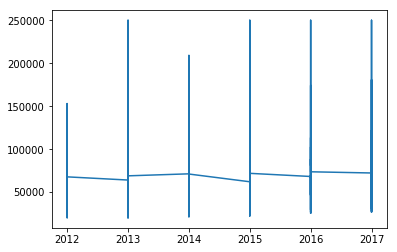

In [8]:
plt.plot(census_pd["Year"], census_pd["Household Income"])

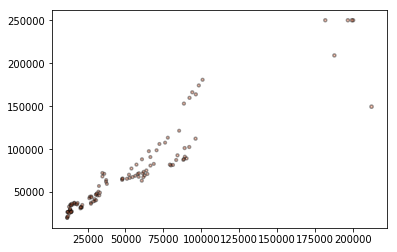

In [14]:
plt.scatter(census_pd["Per Capita Income"], census_pd["Household Income"], marker="o",
            edgecolors="black", linewidths=1.5,
            s=census_pd["Median Age"]/5, alpha=0.4, c="coral")

In [10]:
df_77002 = census_pd[census_pd.Zipcode == '77002']
df_77003 = census_pd[census_pd.Zipcode == '77003']
df_77004 = census_pd[census_pd.Zipcode == '77004']
df_77005 = census_pd[census_pd.Zipcode == '77005']
df_77006 = census_pd[census_pd.Zipcode == '77006']
df_77007 = census_pd[census_pd.Zipcode == '77007']
df_77008 = census_pd[census_pd.Zipcode == '77008']
df_77009 = census_pd[census_pd.Zipcode == '77009']
df_77010 = census_pd[census_pd.Zipcode == '77010']
df_77011 = census_pd[census_pd.Zipcode == '77011']
df_77012 = census_pd[census_pd.Zipcode == '77012']
df_77019 = census_pd[census_pd.Zipcode == '77019']
df_77020 = census_pd[census_pd.Zipcode == '77020']
df_77021 = census_pd[census_pd.Zipcode == '77021']
df_77023 = census_pd[census_pd.Zipcode == '77023']
df_77025 = census_pd[census_pd.Zipcode == '77025']
df_77026 = census_pd[census_pd.Zipcode == '77026']
df_77027 = census_pd[census_pd.Zipcode == '77027']
df_77030 = census_pd[census_pd.Zipcode == '77030']

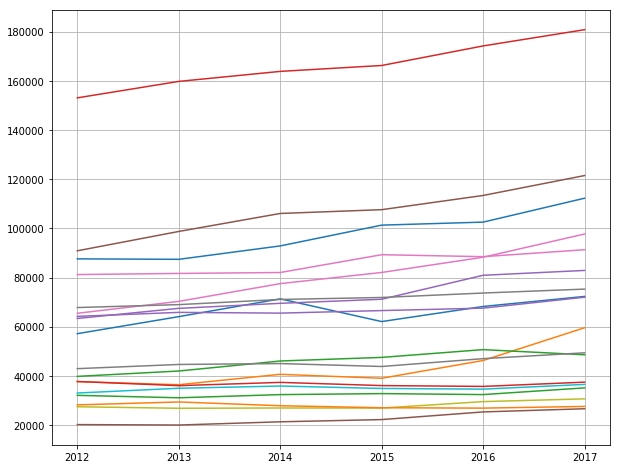

In [11]:
figure(num=None, figsize=(10,8))
plt.plot(df_77002['Year'], df_77002['Household Income'])
plt.plot(df_77003['Year'], df_77003['Household Income'])
plt.plot(df_77004['Year'], df_77004['Household Income'])
plt.plot(df_77005['Year'], df_77005['Household Income'])
plt.plot(df_77006['Year'], df_77006['Household Income'])
plt.plot(df_77007['Year'], df_77007['Household Income'])
plt.plot(df_77008['Year'], df_77008['Household Income'])
plt.plot(df_77009['Year'], df_77009['Household Income'])
# plt.plot(df_77010['Year'], df_77010['Household Income'])
plt.plot(df_77011['Year'], df_77011['Household Income'])
plt.plot(df_77012['Year'], df_77012['Household Income'])
plt.plot(df_77019['Year'], df_77019['Household Income'])
plt.plot(df_77020['Year'], df_77020['Household Income'])
plt.plot(df_77021['Year'], df_77021['Household Income'])
plt.plot(df_77023['Year'], df_77023['Household Income'])
plt.plot(df_77025['Year'], df_77025['Household Income'])
plt.plot(df_77026['Year'], df_77026['Household Income'])
plt.plot(df_77027['Year'], df_77027['Household Income'])
plt.plot(df_77030['Year'], df_77030['Household Income'])


plt.grid()

In [12]:
# trace = go.Scatter(
#     x = df_77002['Year'],
#     y = df_77002['Household Income']
# )

# data = [trace]

# py.iplot(data, filename='basic-line')